<a href="https://colab.research.google.com/github/politerishi/The-Spark-Foundation/blob/main/TASK_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation - Data Science & Business Analytics Internship


## TASK 1- Prediction using Supervised Machine Learning

## Author : RISHI KUMAR

**In this task its required to predict the percentage of a student on the basis of number of hours studied using the Linear Regression supervised machine learning algorithm**

### Steps:
####    Importing the dataset and know our dataset
####    Visualizing the dataset
####     Data preparation
####     Training the algorithm
####     Visualizing the model
####     Making Percentage
####     Evaluating the model

# Steps 1: Importing the dataset and know our dataset

**In this step, we will import the dataset through the link with the help of pandas library and then we will observe the data.**

In [ ]:
# import Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#to display all the graph in the workbook 
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading data from remote link

data = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(data)

In [ ]:
#reading data
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# Display the last 5 
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(25, 2)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# Dataset Columns
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
# Dataset Describe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

<AxesSubplot:ylabel='count'>

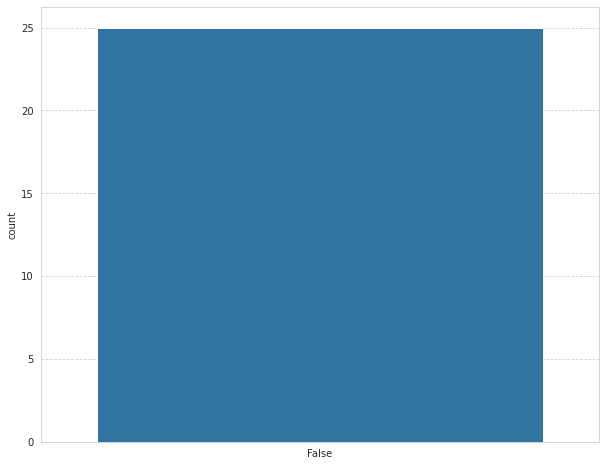

In [ ]:
# Visulizing                          #true means duplicate data
plt.figure(figsize=(10,8))
sns.countplot(x=df.duplicated())

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

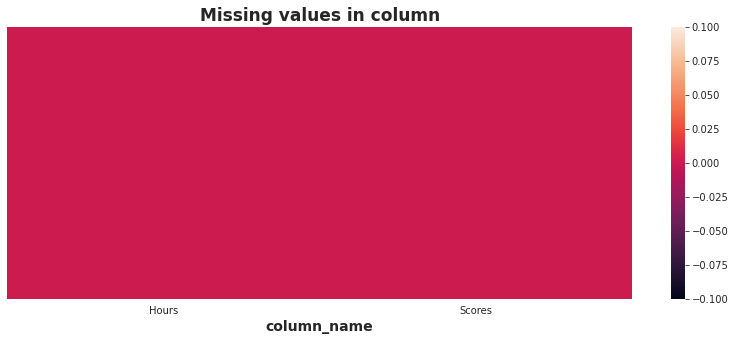

In [ ]:
# Visualizing the missing values
 # Checking Null Value by plotting Heatmap
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("Missing values in column",fontweight="bold",size=17)
plt.show()

### STEP 2 : Visualizing the dataset
    
    In this we will plot the dataset to check whether we can observe any relation between the two variables or not

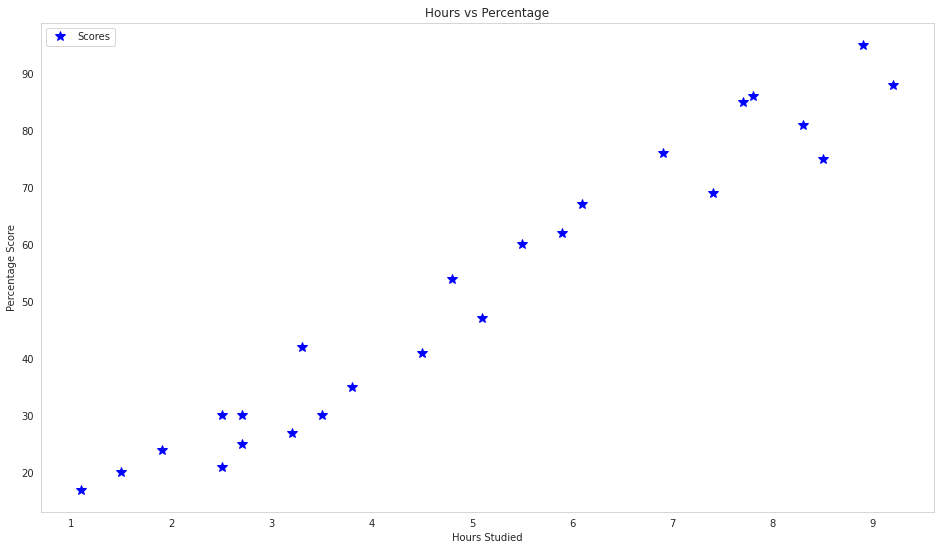

In [ ]:
# Plotting the dataset
plt.rcParams["figure.figsize"] = [16,9]
df.plot(x='Hours',y='Scores',style='*',color='blue',markersize=10)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

##### From the graph above, we can observe that there is a linear relationship between "hours studied" and "percentage score".So we can use the linear regression supervised machine model on it to predict further values.


In [ ]:
# we can also use .corr to determine the correlation between the variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

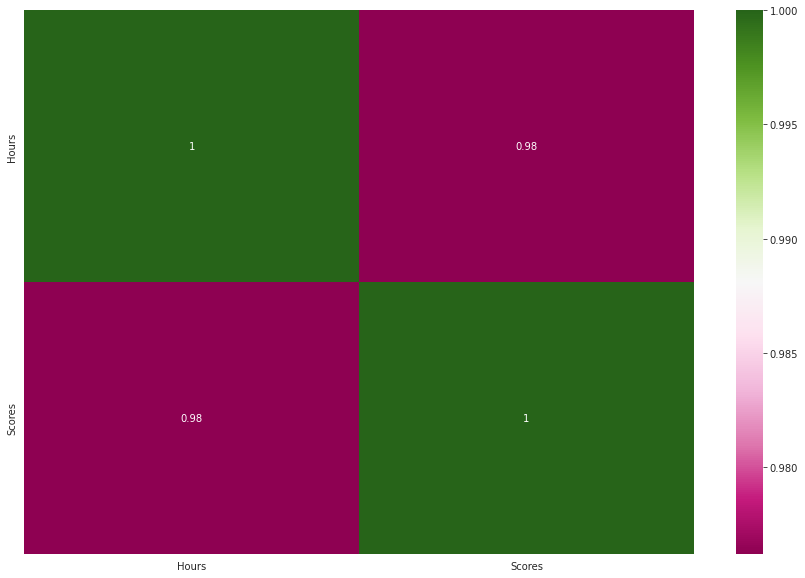

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)

In [ ]:
corr = df.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Hours,Scores
Hours,1.00,0.98
Scores,0.98,1.00


<AxesSubplot:xlabel='Scores', ylabel='count'>

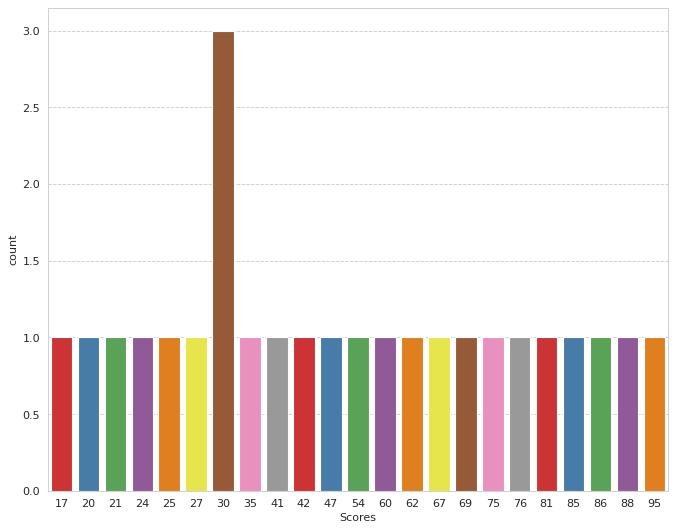

In [ ]:
# Chart - 1 visualization code

plt.figure(figsize=(10,8),dpi=80)
sns.countplot(x='Scores',data=df,palette='Set1')


# STEP 3 : Data Preparation

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#using iloc function we will divide the data
X = df.iloc[:, :1].values
Y = df.iloc[:, 1:].values

In [ ]:
X


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [ ]:
# separate dataset into train and test
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

**We have splited our data into training and testing sets, and now we will train our Model.**

# STEP 4 - Training the Algorithm

# **Linear Regresseion**

In [ ]:
# appying linearRegression
from sklearn.linear_model import LinearRegression

In [ ]:
#creating linear regression model
linear_model= LinearRegression()

In [ ]:
#fitting training data into linear model
linear_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#predicting through linear model
y_pred=linear_model.predict(X_test)

In [ ]:
y_pred

array([[10.1519013 ],
       [32.73976133],
       [18.36566858],
       [86.12924869],
       [48.14057499],
       [77.91548141],
       [61.48794684]])

In [ ]:
linear_model.score(X_train, y_train)

0.965781943975883

**After training the model, now its time to visualize it.**

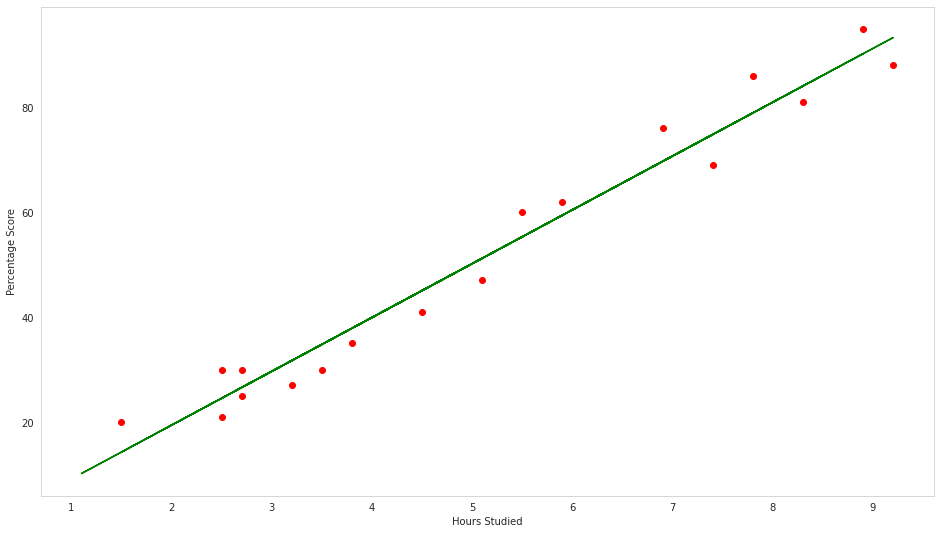

In [ ]:
line = linear_model.coef_*X + linear_model.intercept_

#Plotting for the training data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_train, y_train, color='red')
plt.plot(X, line, color='green');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

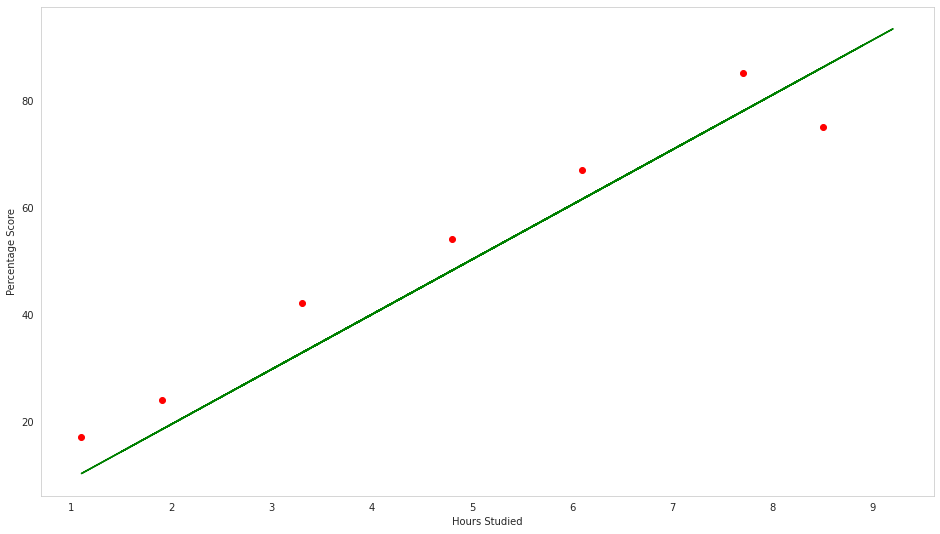

In [ ]:
# Plotting for the testing data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_test, y_test, color='red')
plt.plot(X, line, color='green');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

# Creating Function to train linear models and calculate scores

In [ ]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [ ]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()


================Evalution Matrix=========================

MSE : 854029.4047030656
RMSE : 924.137113583837
R2 : 0.8549378962753198
Adjusted R2 :  0.8259254755303838

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



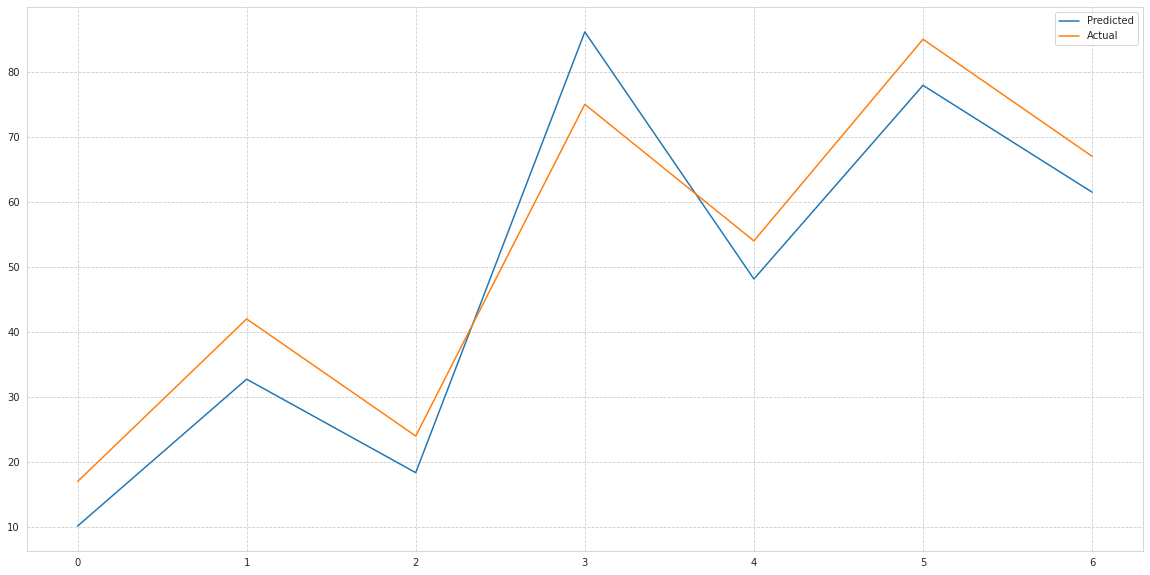

In [ ]:
# calling train_linear_model to train,fit and evalution of linear model
train_linear_model(linear_model,X_train,y_train,X_test,y_test)

# Regularisation
# Lasso Regression

In [ ]:
#importing lasso 
from sklearn.linear_model import Lasso

In [ ]:

lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)


================Evalution Matrix=========================

MSE : 854026.2598823305
RMSE : 924.135412091935
R2 : 0.8549384304423042
Adjusted R2 :  0.8259261165307651

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



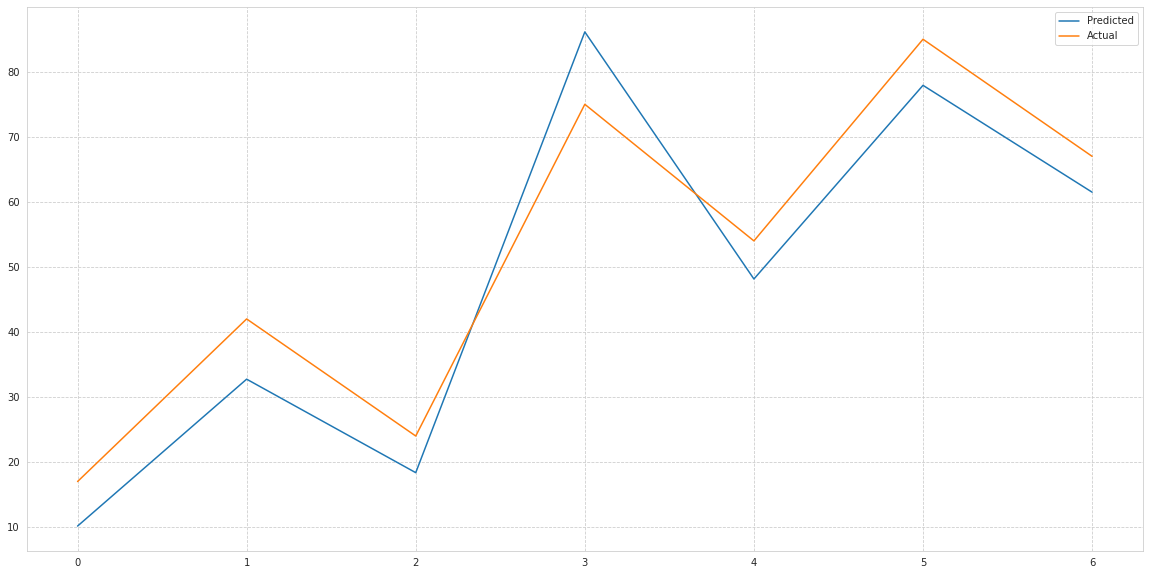

In [ ]:
# calling train_linear_model to train,fit and evalution of lasso model
train_linear_model(lasso,X_train,y_train,X_test,y_test)

In [ ]:
lasso.score(X_train, y_train)

0.9657819439731559

# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)


================Evalution Matrix=========================

MSE : 1079492.4073642152
RMSE : 1038.9862402189046
R2 : 0.8166416300132923
Adjusted R2 :  0.7799699560159508

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



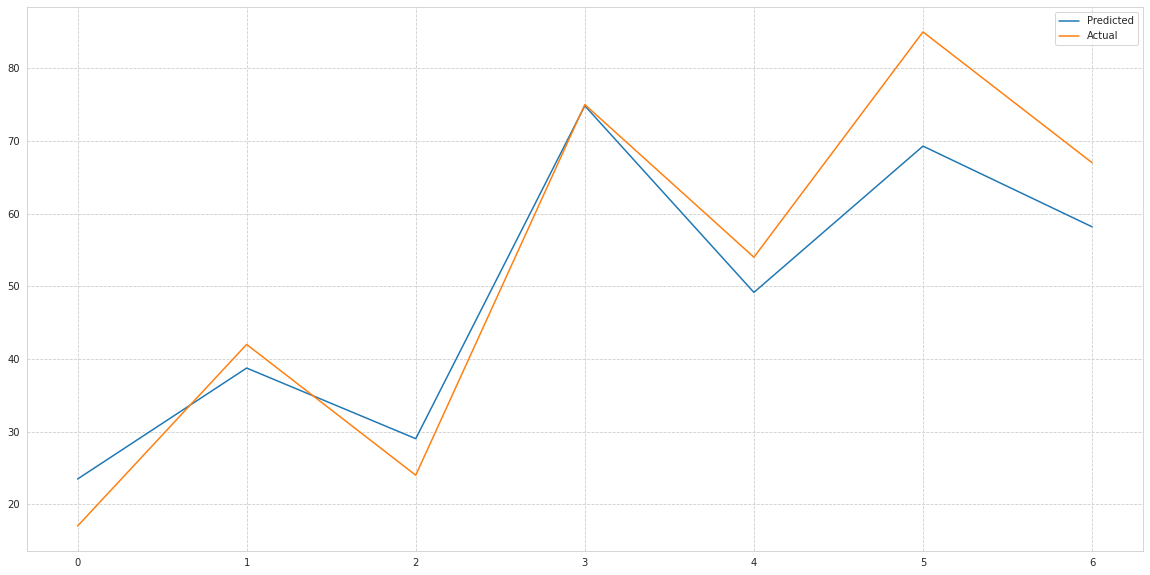

In [ ]:
# calling train_linear_model to train,fit and evalution of ridge model
train_linear_model(ridge_reg,X_train,y_train,X_test,y_test)

In [ ]:
ridge_reg.score(X_train, y_train)

0.8644091293899759

In [ ]:
# Testing with your own data

hours = 9.25
own_pred = linear_model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.82965552]


Hence, it can be concluded that the predicted score if a person studies for 9.25 hours is 93.69173249

In [ ]:
# Testing with your own data

hours = 2
own_pred = linear_model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 2 hours is [19.39238949]


Hence, it can be concluded that the predicted score if a person studies for 2 hours is 19.39238949